In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
mean0 = -5.0
mean1 = 5.0

In [21]:
x0 = np.random.normal(loc=mean0, scale=1.0, size=(200,))
x1 = np.random.normal(loc=mean1, scale=1.0, size=(200,))

In [29]:
dataset = np.concatenate([x0, x1], axis=0)

In [30]:
dataset

array([-5.59807046, -4.81757388, -4.82282035, -4.8829602 , -4.83760261,
       -6.8124403 , -6.10895242, -4.19379295, -5.32969763, -5.85600978,
       -3.6572752 , -5.28130665, -5.86987354, -5.21028439, -5.24864087,
       -5.45715897, -3.3952509 , -4.36446412, -6.09991628, -4.70709584,
       -5.29898785, -5.09436611, -5.00601553, -3.52723863, -4.26148477,
       -5.44053969, -3.74867971, -4.32875947, -4.98859814, -4.5233555 ,
       -2.89201371, -5.92040126, -3.27002723, -6.79348491, -4.75456109,
       -4.83622666, -3.58207819, -5.54784767, -3.95714879, -3.83005452,
       -4.7879585 , -5.22344052, -5.36706056, -4.47155233, -4.49618068,
       -6.89384858, -4.79804884, -6.99633176, -5.11375478, -5.05484593,
       -4.43427353, -5.40641223, -5.11385601, -6.1247753 , -5.15649499,
       -4.46404207, -6.12881611, -4.68313527, -4.44919811, -5.70379153,
       -5.53566587, -5.15503719, -6.73487418, -7.16151545, -3.90296356,
       -5.04611359, -5.10888096, -4.62917566, -5.0389117 , -5.45

(array([13., 20., 50., 71., 35.,  9.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 16., 47., 63., 46., 18., 10.]),
 array([-7.48376358, -6.73651518, -5.98926677, -5.24201837, -4.49476996,
        -3.74752155, -3.00027315, -2.25302474, -1.50577634, -0.75852793,
        -0.01127953,  0.73596888,  1.48321728,  2.23046569,  2.97771409,
         3.7249625 ,  4.4722109 ,  5.21945931,  5.96670772,  6.71395612,
         7.46120453]),
 <BarContainer object of 20 artists>)

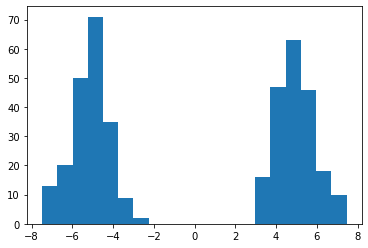

In [31]:
plt.hist(dataset, bins=20)

In [25]:
from e3moldiffusion.sde import VPSDE, DiscreteDDPM

In [47]:
sde = DiscreteDDPM(N=1000, schedule="linear")

In [56]:
t = torch.arange(0, 1000)
dataset_torch = torch.from_numpy(dataset).float()

In [57]:
def get_next_step(x_t, t, scheduler):
    mean, std  = scheduler.alphas[t], scheduler.sqrt_betas[t]
    noise = torch.randn_like(x_t)
    xtp1 = mean.unsqueeze(-1) * x_t + std.unsqueeze(-1) * noise
    return xtp1

In [58]:
subset = [0, 399]

In [59]:
x0 = dataset_torch[subset].unsqueeze(-1)

In [60]:
x0

tensor([[-5.5981],
        [ 4.0830]])

In [61]:
x0.shape

torch.Size([2, 1])

In [62]:
tt.shape

torch.Size([2000])

In [65]:
trajs = [x0]
xt = xtp1 = x0
for timestep in t:
    tt = timestep.repeat_interleave(2)
    xtp1 = get_next_step(xt, tt, sde)
    trajs.append(xtp1)
    xt = xtp1

In [66]:
timestep

tensor(999)

In [67]:
trajs

[tensor([[-5.5981],
         [ 4.0830]]),
 tensor([[-5.5896],
         [ 4.0907]]),
 tensor([[-5.5807],
         [ 4.1092]]),
 tensor([[-5.5673],
         [ 4.1121]]),
 tensor([[-5.5677],
         [ 4.1478]]),
 tensor([[-5.5519],
         [ 4.1572]]),
 tensor([[-5.5296],
         [ 4.1532]]),
 tensor([[-5.5436],
         [ 4.1213]]),
 tensor([[-5.5414],
         [ 4.1025]]),
 tensor([[-5.5704],
         [ 4.0942]]),
 tensor([[-5.5884],
         [ 4.1070]]),
 tensor([[-5.5782],
         [ 4.1020]]),
 tensor([[-5.5782],
         [ 4.1087]]),
 tensor([[-5.5736],
         [ 4.1156]]),
 tensor([[-5.5869],
         [ 4.1021]]),
 tensor([[-5.5756],
         [ 4.1137]]),
 tensor([[-5.5662],
         [ 4.1045]]),
 tensor([[-5.5286],
         [ 4.0963]]),
 tensor([[-5.5504],
         [ 4.0705]]),
 tensor([[-5.5582],
         [ 4.0861]]),
 tensor([[-5.5672],
         [ 4.0516]]),
 tensor([[-5.5618],
         [ 4.0804]]),
 tensor([[-5.5774],
         [ 4.0845]]),
 tensor([[-5.6005],
         [ 4.0

In [68]:
trajs = torch.stack(trajs, dim=0)

In [69]:
trajs.shape

torch.Size([1001, 2, 1])

In [ ]:
trajs